In [1]:
#PRIMERA PARTE
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

url="https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allrep.data"
url2 ="https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allrep.test"
data1 = pd.read_csv(url, header=None, na_values="?")  #2800 registros
data2 = pd.read_csv(url2, header=None, na_values="?") #972 registros
data = pd.concat([data1,data2])

#Ponemos nombre a las columnas 
data.columns = ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant',
              'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
               'psych', 'TSH measured','TSH','T3 measured','T3','TT4 measured','TT4','T4U measured','T4U','FTI measured',
               'FTI','TBG measured','TBG','referral source','Diagnostico']

#En esta parte elimino los numeros de la columna de diagnostico 
data['Diagnostico'] = list(map(lambda x:x.split('.')[0],data['Diagnostico']))
data


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Diagnostico
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,replacement therapy
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,30.0,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,negative
968,68.0,F,f,f,f,f,f,f,f,f,...,t,124.0,t,1.08,t,114.0,f,NaN,SVI,negative
969,74.0,F,f,f,f,f,f,f,f,f,...,t,112.0,t,1.07,t,105.0,f,NaN,other,negative
970,72.0,M,f,f,f,f,f,f,f,f,...,t,82.0,t,0.94,t,87.0,f,NaN,SVI,negative


In [2]:
#número de registros y atributos
shape = data.shape
shape

(3772, 30)

In [3]:
#tipo de datos
data. dtypes

age                          float64
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH measured                  object
TSH                          float64
T3 measured                   object
T3                           float64
TT4 measured                  object
TT4                          float64
T4U measured                  object
T4U                          float64
FTI measured                  object
FTI                          float64
TBG measured                  object
T

In [4]:
#Medidas de centralidad y desviación para atributos numéricos:
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3771.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000,0.0
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649,NaN
std,20.084958,24.521470,0.827434,35.604248,0.195457,33.089698,NaN
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,NaN
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000,NaN
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000,NaN
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000,NaN
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,NaN


In [5]:
# Media de cada uno con respecto al resultado del diagnostico
grouped_data = data.groupby('Diagnostico')
grouped_data.mean()

,age,TSH,T3,TT4,T4U,FTI,TBG
Diagnostico,,,,,,,
negative,51.630381,4.996804,2.014745,106.982680,0.994837,109.128388,NaN
overreplacement,52.470588,0.071364,2.596296,189.352941,0.989706,191.441176,NaN
replacement therapy,57.157895,0.286351,1.909524,164.578947,0.959714,170.685714,NaN
underreplacement,54.692308,17.361538,1.536111,101.960784,1.034694,100.755102,NaN


/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


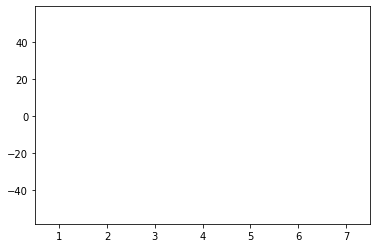

In [6]:
#Diagrama de cajas y bigotes para atributos numéricos

plt.boxplot((data['age'],data['TSH'],data['T3'],data['TT4'],data['T4U'], data['FTI'], data['TBG']))
plt.show()

In [7]:
#Medidas de centralidad para atributos categóricos:
data.mode()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Diagnostico
0,59.0,F,f,f,f,f,f,f,f,f,...,t,101.0,t,0.99,t,100.0,f,NaN,other,negative


In [8]:
#matriz de correlación
data.corr()

,age,TSH,T3,TT4,T4U,FTI,TBG
age,1.000000,-0.059087,-0.238412,-0.038841,-0.166250,0.052788,NaN
TSH,-0.059087,1.000000,-0.161823,-0.267365,0.073391,-0.304684,NaN
T3,-0.238412,-0.161823,1.000000,0.559503,0.454127,0.348921,NaN
TT4,-0.038841,-0.267365,0.559503,1.000000,0.434572,0.793312,NaN
T4U,-0.166250,0.073391,0.454127,0.434572,1.000000,-0.174012,NaN
FTI,0.052788,-0.304684,0.348921,0.793312,-0.174012,1.000000,NaN
TBG,NaN,NaN,NaN,NaN,NaN,NaN,NaN


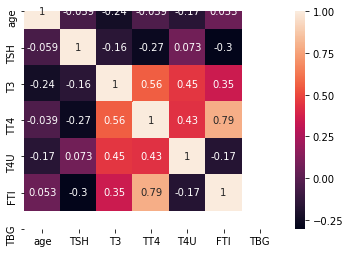

In [9]:
sns.heatmap(data.corr(), square=True, annot=True)

In [10]:
# Cual es el máximo de datos faltantes en un mismo registro?
max(data.isnull().sum(axis=1))

7

In [11]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
Diagnostico   

/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


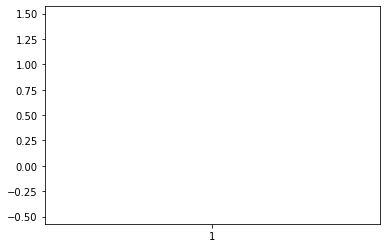

/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


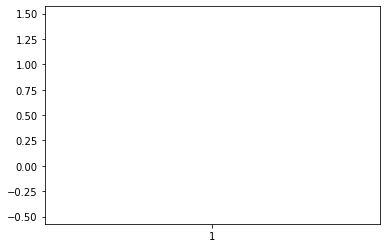

/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


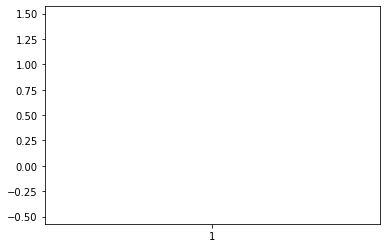

/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


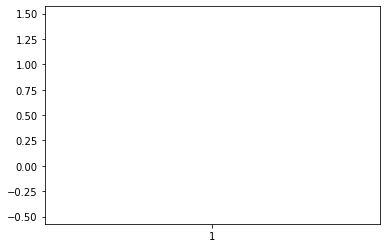

/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


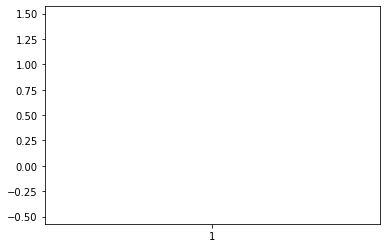

/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


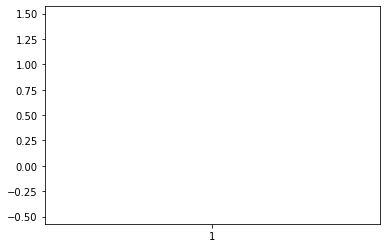

/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


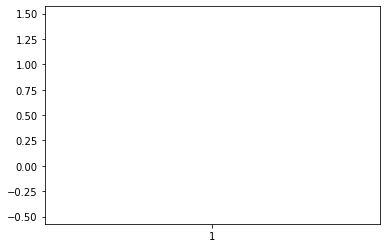

In [12]:
#En qué atributos hay datos atípicos?
plt.boxplot(data['age'])
plt.show()
plt.boxplot(data['TSH'])
plt.show()
plt.boxplot(data['T3'])
plt.show()
plt.boxplot(data['TT4'])
plt.show()
plt.boxplot(data['T4U'])
plt.show()
plt.boxplot(data['FTI'])
plt.show()
plt.boxplot(data['TBG'])
plt.show()

negative               3648
underreplacement         52
replacement therapy      38
overreplacement          34
Name: Diagnostico, dtype: int64


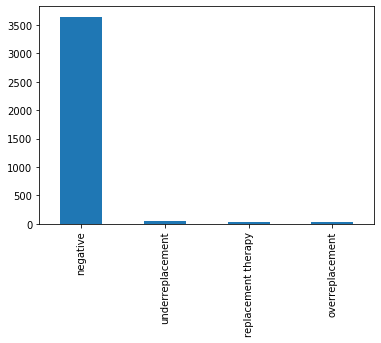

In [13]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?
clasificar = data['Diagnostico'].value_counts()
print(clasificar)
clasificar.plot(kind='bar');

# Análisis de los Resultados

Escribir aquí las conclusiones obtenidas del análisis del conjunto de datos.


-    El conjunto es viable?
    
    El conjunto de datos presenta distribuciones convenientes que permiten clasificarlos en las
    4 clases deseadas, por lo tanto el conjunto permitirá obtener información valiosa.
    
    
-   Cuáles son las dificultades más significativas que tiene el conjunto de datos?

    - Hay una cantidad significativa de datos númericos faltantes(incluso hay una columna completa que hace falta)                     razón por lo cual no se pueden hacer los diagramas de cajas para análizar los datos atípicos.
    
    - Hay una mayor cantidad de registros que se clasifican como "negative", por lo que se necesita un balance,   pues  mientras la cantidad de registros que permiten llegar a la anterior clasificación son 3648, los registros
que permiten llegar a las 3 clasificaciones restantes son 124. 
    
    - La matriz de correlación permite identificar atributos muy parecidos,FTI y TT4 presentan un valor de
    correlación muy alto, pues es de 0.79.
    
    
-   Es necesario eliminar atributos?

    Si, hay un atributo que no presenta ningún valor, por lo que pienso que es necesario eliminarlo,pues no 
    aporta en absoluto.
    

-   Es necesario eliminar registros?
    
    No es necesario pero pienso que es conveniente hacerlo, hay registros que pueden tener hasta 7 atributos
    sin valor, por lo que llenarlos con la moda realmente no solucionaría el problema, entonces creo correcto
    eliminar aquellos que presenten una cantidad considerable de atributos vacíos.
    
    
-   Se van a reemplazar los valores nulos por algún valor?
    
    Si, aquellos registros que haya considerado no eliminar porque no presentan muchos atributos vacíos, 
    entonces se llenarán con lo moda.
    
    
-   Cómo se van a manejar los datos atípicos?
    
    Como dije antes, existen una cantidad considerable de datos númericos faltantes por lo que análizar los datos
    atípicos no se pudo realizar, sin embargo la idea es no eliminarlos hasta que los pueda probar con los datos
    de entrenamiento ya que pueden resultar bastante útiles, pero si al final sucede lo contrario, se eliminarán.
    
    
-   Es necesario normalizar los valores de los atributos?

    Si, debido a que tengo muchos datos categóricos que al convertirlos a númericos podría mal interpretar la 
    información con los demás datos, por ello pienso que es conveniente. De esta manera fijaría un rango mucho
    más manejable.

    
-   Están los datos desbalanceados?

    Si, existe una mayor cantidad de datos que se agrupan en una clase, mientras que las demás clases tienen unos
    pocos registros, por lo que es conveniente ajustarlos para balancearlos.
